In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [8]:
cleaned_dataset = pd.read_csv('../data/feature-engineered/feature_engineered_youtube_data.csv')
cleaned_dataset

,video_id,category_id,country,channel_id,channel_title,logged_at_initial,view_count_initial,like_count_initial,comment_count_initial,c_view_count_initial,...,published_time,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,comment_count_difference,avg_comment_diff_per_category,subscriber_count_difference,engagement_score,channel_authority
0,_55LMf_jcmI,23.0,IN,UCW5BK3XuTUdmF_tbvqZUdyw,Aapna YouTube,2025-07-24 20:19:07,313.0,3.0,0.0,785521.0,...,19:40:50,159.0,1.0,1012.863636,34.636364,0.0,1.500000,0.0,0.006289,7.462215
1,_HRtp_qRRxM,24.0,unknown,UCFE95GtO0mNBj1xGe3cP5AA,Tango1968,2025-07-24 20:19:07,1.0,0.0,0.0,357560.0,...,20:12:03,4.0,0.0,1079.757576,31.742424,0.0,1.696970,0.0,0.000000,6.762730
2,_HT11MhWeno,20.0,US,UCF9713wTuPr5wiEIdA4TWag,Jake Snussbuster,2025-07-24 20:19:07,6.0,0.0,0.0,43478.0,...,20:07:08,18.0,0.0,7633.540541,38.891892,0.0,0.324324,-1.0,0.000000,5.852202
3,_lqSpfXSGbw,24.0,IN,UCIWSJ3Ef7CM5aCAaWELCDCw,Edik Report,2025-07-24 20:19:07,3257.0,0.0,1.0,34502534.0,...,19:30:13,1873.0,0.0,1079.757576,31.742424,1.0,1.696970,0.0,0.001602,11.502885
4,-2OQrsjoKZ0,24.0,US,UCmLQp9v8O0wipphwRk2tw9w,BRO GARY RADIO,2025-07-24 20:19:07,981.0,59.0,0.0,4489959.0,...,19:47:20,230.0,1.0,1079.757576,31.742424,1.0,1.696970,0.0,0.017391,10.038936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,zTTpfnT2H5E,10.0,PL,UCgSrxLTgl-mo4j_ditmlwmw,DDOT,2025-07-24 20:19:08,298.0,88.0,33.0,7799553.0,...,19:30:06,167.0,27.0,218.923077,4.076923,5.0,0.692308,0.0,0.251497,9.532496
346,zV6PRjqIZcc,24.0,NP,UCPbluenJCy3Ovx2xXLPNPqQ,Parbati Ghimire Paudel,2025-07-24 20:19:08,12.0,4.0,0.0,379929.0,...,19:18:12,24.0,2.0,1079.757576,31.742424,2.0,1.696970,0.0,0.333333,7.749753
347,ZvTcSE7glCA,20.0,IN,UCkzFW83o_hkdGFA_ECaHKQg,TRIDENT NINJA,2025-07-24 20:19:08,6067.0,448.0,0.0,13849440.0,...,19:35:54,1942.0,216.0,7633.540541,38.891892,0.0,0.324324,100.0,0.471679,10.866681
348,ZWaWBOOLkL8,24.0,IN,UCD5c2bBZ7mEA3a_wGY-IxgA,AV Films,2025-07-24 20:19:08,115.0,2.0,0.0,59960.0,...,19:22:20,5.0,2.0,1079.757576,31.742424,0.0,1.696970,0.0,0.400000,5.587249


In [9]:
scaler = StandardScaler()
cleaned_dataset[['c_subscriber_count_initial', 'c_subscriber_count_final']] = scaler.fit_transform(
    cleaned_dataset[['c_subscriber_count_initial', 'c_subscriber_count_final']]
)

In [10]:
cleaned_dataset['c_subscriber_count_initial']


0     -0.342770
1     -0.344238
2     -0.345104
3     -0.179822
4     -0.307319
         ...   
345   -0.322565
346   -0.341798
347   -0.257895
348   -0.345240
349    0.786876
Name: c_subscriber_count_initial, Length: 350, dtype: float64

In [11]:
cleaned_dataset.columns

Index(['video_id', 'category_id', 'country', 'channel_id', 'channel_title',
       'logged_at_initial', 'view_count_initial', 'like_count_initial',
       'comment_count_initial', 'c_view_count_initial',
       'c_subscriber_count_initial', 'logged_at_final', 'view_count_final',
       'like_count_final', 'comment_count_final', 'c_view_count_final',
       'c_subscriber_count_final', 'published_year', 'published_month',
       'published_day_of_week', 'published_time', 'view_count_difference',
       'like_count_difference', 'avg_view_diff_per_category',
       'avg_likes_diff_per_category', 'comment_count_difference',
       'avg_comment_diff_per_category', 'subscriber_count_difference',
       'engagement_score', 'channel_authority'],
      dtype='object')

In [12]:
correlation_matrix = cleaned_dataset.corr(numeric_only=True).abs()
correlation_matrix

,category_id,view_count_initial,like_count_initial,comment_count_initial,c_view_count_initial,c_subscriber_count_initial,view_count_final,like_count_final,comment_count_final,c_view_count_final,...,published_month,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,comment_count_difference,avg_comment_diff_per_category,subscriber_count_difference,engagement_score,channel_authority
category_id,1.000000,0.004232,0.001706,0.052698,0.080327,0.110515,0.002864,0.015660,0.003399,0.080245,...,NaN,0.027294,0.043313,0.100607,0.269193,0.018871,0.161765,0.009559,0.024332,0.084157
view_count_initial,0.004232,1.000000,0.963430,0.039118,0.058741,0.123069,0.968730,0.838256,0.016516,0.058741,...,NaN,0.127959,0.023365,0.177378,0.042404,0.003673,0.088316,0.013048,0.008667,0.126107
like_count_initial,0.001706,0.963430,1.000000,0.135401,0.106047,0.176504,0.954232,0.920446,0.107004,0.106055,...,NaN,0.206935,0.151631,0.217934,0.014825,0.075679,0.078683,0.001612,0.011865,0.171682
comment_count_initial,0.052698,0.039118,0.135401,1.000000,0.320012,0.266198,0.054075,0.241232,0.710871,0.320051,...,NaN,0.069683,0.315399,0.062240,0.014532,0.458595,0.043737,0.029170,0.007292,0.244231
c_view_count_initial,0.080327,0.058741,0.106047,0.320012,1.000000,0.825840,0.103505,0.245004,0.292602,1.000000,...,NaN,0.193789,0.388810,0.041462,0.007878,0.229029,0.010260,0.035430,0.024465,0.524520
c_subscriber_count_initial,0.110515,0.123069,0.176504,0.266198,0.825840,1.000000,0.139430,0.251876,0.212215,0.825765,...,NaN,0.096528,0.252874,0.050907,0.056976,0.151116,0.050884,0.024882,0.026163,0.499679
view_count_final,0.002864,0.968730,0.954232,0.054075,0.103505,0.139430,1.000000,0.855215,0.041893,0.103548,...,NaN,0.370036,0.086265,0.234024,0.042829,0.029161,0.106248,0.018377,0.013176,0.170641
like_count_final,0.015660,0.838256,0.920446,0.241232,0.245004,0.251876,0.855215,1.000000,0.345173,0.245018,...,NaN,0.279826,0.525918,0.184615,0.050869,0.330083,0.010536,0.030434,0.017321,0.255591
comment_count_final,0.003399,0.016516,0.107004,0.710871,0.292602,0.212215,0.041893,0.345173,1.000000,0.292569,...,NaN,0.105613,0.640039,0.053651,0.088016,0.951006,0.107545,0.024882,0.008329,0.227651
c_view_count_final,0.080245,0.058741,0.106055,0.320051,1.000000,0.825765,0.103548,0.245018,0.292569,1.000000,...,NaN,0.193963,0.388828,0.041434,0.007853,0.228970,0.010250,0.035400,0.024476,0.524591


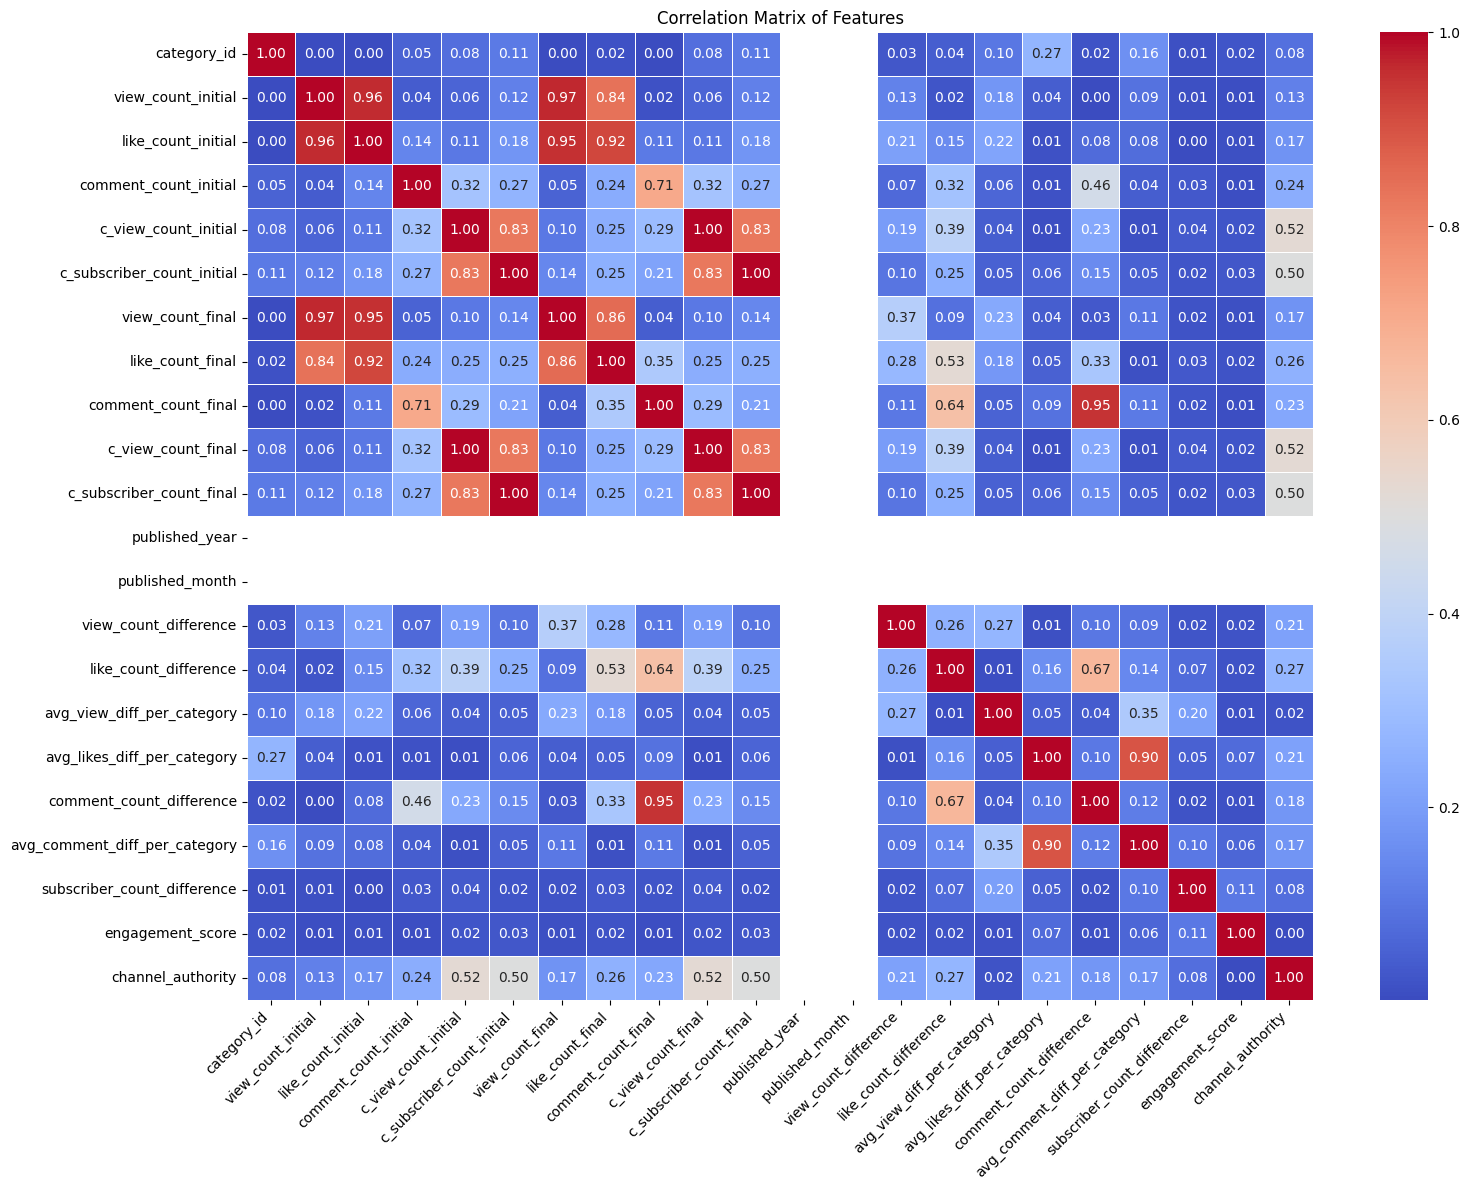

In [13]:
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
# Select upper triangle of correlation matrix to avoid duplicates
upper_tri = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

# Find features with correlation greater than 0.9
high_corr_pairs = [
    (column, row, upper_tri.loc[row, column])
    for column in upper_tri.columns
    for row in upper_tri.index
    if upper_tri.loc[row, column] > 0.9
]

# Sort by correlation strength (optional)
high_corr_pairs = sorted(high_corr_pairs, key=lambda x: -x[2])
for feature1, feature2, corr_value in high_corr_pairs:
    print(f"{feature1} ↔ {feature2}: {corr_value:.2f}")

c_subscriber_count_final ↔ c_subscriber_count_initial: 1.00
c_view_count_final ↔ c_view_count_initial: 1.00
view_count_final ↔ view_count_initial: 0.97
like_count_initial ↔ view_count_initial: 0.96
view_count_final ↔ like_count_initial: 0.95
comment_count_difference ↔ comment_count_final: 0.95
like_count_final ↔ like_count_initial: 0.92


In [15]:
columns_to_drop = [
    'c_subscriber_count_final',
    'c_view_count_final',
    'comment_count_final',
    'comment_count_initial',
    'comment_count_difference',
    'avg_comment_diff_per_category',
    'subscriber_count_difference',
    'video_id',
    'country',
    'channel_title'
]

cleaned_dataset.drop(columns=columns_to_drop, inplace=True)


In [16]:
cleaned_dataset

,category_id,channel_id,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,c_subscriber_count_initial,logged_at_final,view_count_final,like_count_final,published_year,published_month,published_day_of_week,published_time,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,engagement_score,channel_authority
0,23.0,UCW5BK3XuTUdmF_tbvqZUdyw,2025-07-24 20:19:07,313.0,3.0,785521.0,-0.342770,2025-07-24 21:19:23,472.0,4.0,2025,7,Thursday,19:40:50,159.0,1.0,1012.863636,34.636364,0.006289,7.462215
1,24.0,UCFE95GtO0mNBj1xGe3cP5AA,2025-07-24 20:19:07,1.0,0.0,357560.0,-0.344238,2025-07-24 21:19:23,5.0,0.0,2025,7,Thursday,20:12:03,4.0,0.0,1079.757576,31.742424,0.000000,6.762730
2,20.0,UCF9713wTuPr5wiEIdA4TWag,2025-07-24 20:19:07,6.0,0.0,43478.0,-0.345104,2025-07-24 21:19:23,24.0,0.0,2025,7,Thursday,20:07:08,18.0,0.0,7633.540541,38.891892,0.000000,5.852202
3,24.0,UCIWSJ3Ef7CM5aCAaWELCDCw,2025-07-24 20:19:07,3257.0,0.0,34502534.0,-0.179822,2025-07-24 21:19:23,5130.0,0.0,2025,7,Thursday,19:30:13,1873.0,0.0,1079.757576,31.742424,0.001602,11.502885
4,24.0,UCmLQp9v8O0wipphwRk2tw9w,2025-07-24 20:19:07,981.0,59.0,4489959.0,-0.307319,2025-07-24 21:19:23,1211.0,60.0,2025,7,Thursday,19:47:20,230.0,1.0,1079.757576,31.742424,0.017391,10.038936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,10.0,UCgSrxLTgl-mo4j_ditmlwmw,2025-07-24 20:19:08,298.0,88.0,7799553.0,-0.322565,2025-07-24 21:19:24,465.0,115.0,2025,7,Thursday,19:30:06,167.0,27.0,218.923077,4.076923,0.251497,9.532496
346,24.0,UCPbluenJCy3Ovx2xXLPNPqQ,2025-07-24 20:19:08,12.0,4.0,379929.0,-0.341798,2025-07-24 21:19:24,36.0,6.0,2025,7,Thursday,19:18:12,24.0,2.0,1079.757576,31.742424,0.333333,7.749753
347,20.0,UCkzFW83o_hkdGFA_ECaHKQg,2025-07-24 20:19:08,6067.0,448.0,13849440.0,-0.257895,2025-07-24 21:19:24,8009.0,664.0,2025,7,Thursday,19:35:54,1942.0,216.0,7633.540541,38.891892,0.471679,10.866681
348,24.0,UCD5c2bBZ7mEA3a_wGY-IxgA,2025-07-24 20:19:08,115.0,2.0,59960.0,-0.345240,2025-07-24 21:19:24,120.0,4.0,2025,7,Thursday,19:22:20,5.0,2.0,1079.757576,31.742424,0.400000,5.587249


In [17]:
cleaned_dataset['logged_at_initial_hour'] = pd.to_datetime(cleaned_dataset['logged_at_initial']).dt.hour
cleaned_dataset['logged_at_final_hour'] = pd.to_datetime(cleaned_dataset['logged_at_final']).dt.hour


In [18]:
cleaned_dataset

,category_id,channel_id,logged_at_initial,view_count_initial,like_count_initial,c_view_count_initial,c_subscriber_count_initial,logged_at_final,view_count_final,like_count_final,...,published_day_of_week,published_time,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,engagement_score,channel_authority,logged_at_initial_hour,logged_at_final_hour
0,23.0,UCW5BK3XuTUdmF_tbvqZUdyw,2025-07-24 20:19:07,313.0,3.0,785521.0,-0.342770,2025-07-24 21:19:23,472.0,4.0,...,Thursday,19:40:50,159.0,1.0,1012.863636,34.636364,0.006289,7.462215,20.0,21.0
1,24.0,UCFE95GtO0mNBj1xGe3cP5AA,2025-07-24 20:19:07,1.0,0.0,357560.0,-0.344238,2025-07-24 21:19:23,5.0,0.0,...,Thursday,20:12:03,4.0,0.0,1079.757576,31.742424,0.000000,6.762730,20.0,21.0
2,20.0,UCF9713wTuPr5wiEIdA4TWag,2025-07-24 20:19:07,6.0,0.0,43478.0,-0.345104,2025-07-24 21:19:23,24.0,0.0,...,Thursday,20:07:08,18.0,0.0,7633.540541,38.891892,0.000000,5.852202,20.0,21.0
3,24.0,UCIWSJ3Ef7CM5aCAaWELCDCw,2025-07-24 20:19:07,3257.0,0.0,34502534.0,-0.179822,2025-07-24 21:19:23,5130.0,0.0,...,Thursday,19:30:13,1873.0,0.0,1079.757576,31.742424,0.001602,11.502885,20.0,21.0
4,24.0,UCmLQp9v8O0wipphwRk2tw9w,2025-07-24 20:19:07,981.0,59.0,4489959.0,-0.307319,2025-07-24 21:19:23,1211.0,60.0,...,Thursday,19:47:20,230.0,1.0,1079.757576,31.742424,0.017391,10.038936,20.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,10.0,UCgSrxLTgl-mo4j_ditmlwmw,2025-07-24 20:19:08,298.0,88.0,7799553.0,-0.322565,2025-07-24 21:19:24,465.0,115.0,...,Thursday,19:30:06,167.0,27.0,218.923077,4.076923,0.251497,9.532496,20.0,21.0
346,24.0,UCPbluenJCy3Ovx2xXLPNPqQ,2025-07-24 20:19:08,12.0,4.0,379929.0,-0.341798,2025-07-24 21:19:24,36.0,6.0,...,Thursday,19:18:12,24.0,2.0,1079.757576,31.742424,0.333333,7.749753,20.0,21.0
347,20.0,UCkzFW83o_hkdGFA_ECaHKQg,2025-07-24 20:19:08,6067.0,448.0,13849440.0,-0.257895,2025-07-24 21:19:24,8009.0,664.0,...,Thursday,19:35:54,1942.0,216.0,7633.540541,38.891892,0.471679,10.866681,20.0,21.0
348,24.0,UCD5c2bBZ7mEA3a_wGY-IxgA,2025-07-24 20:19:08,115.0,2.0,59960.0,-0.345240,2025-07-24 21:19:24,120.0,4.0,...,Thursday,19:22:20,5.0,2.0,1079.757576,31.742424,0.400000,5.587249,20.0,21.0


In [19]:
cleaned_dataset.drop(columns=['logged_at_initial','logged_at_final'], inplace=True)


In [20]:
cleaned_dataset

,category_id,channel_id,view_count_initial,like_count_initial,c_view_count_initial,c_subscriber_count_initial,view_count_final,like_count_final,published_year,published_month,published_day_of_week,published_time,view_count_difference,like_count_difference,avg_view_diff_per_category,avg_likes_diff_per_category,engagement_score,channel_authority,logged_at_initial_hour,logged_at_final_hour
0,23.0,UCW5BK3XuTUdmF_tbvqZUdyw,313.0,3.0,785521.0,-0.342770,472.0,4.0,2025,7,Thursday,19:40:50,159.0,1.0,1012.863636,34.636364,0.006289,7.462215,20.0,21.0
1,24.0,UCFE95GtO0mNBj1xGe3cP5AA,1.0,0.0,357560.0,-0.344238,5.0,0.0,2025,7,Thursday,20:12:03,4.0,0.0,1079.757576,31.742424,0.000000,6.762730,20.0,21.0
2,20.0,UCF9713wTuPr5wiEIdA4TWag,6.0,0.0,43478.0,-0.345104,24.0,0.0,2025,7,Thursday,20:07:08,18.0,0.0,7633.540541,38.891892,0.000000,5.852202,20.0,21.0
3,24.0,UCIWSJ3Ef7CM5aCAaWELCDCw,3257.0,0.0,34502534.0,-0.179822,5130.0,0.0,2025,7,Thursday,19:30:13,1873.0,0.0,1079.757576,31.742424,0.001602,11.502885,20.0,21.0
4,24.0,UCmLQp9v8O0wipphwRk2tw9w,981.0,59.0,4489959.0,-0.307319,1211.0,60.0,2025,7,Thursday,19:47:20,230.0,1.0,1079.757576,31.742424,0.017391,10.038936,20.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,10.0,UCgSrxLTgl-mo4j_ditmlwmw,298.0,88.0,7799553.0,-0.322565,465.0,115.0,2025,7,Thursday,19:30:06,167.0,27.0,218.923077,4.076923,0.251497,9.532496,20.0,21.0
346,24.0,UCPbluenJCy3Ovx2xXLPNPqQ,12.0,4.0,379929.0,-0.341798,36.0,6.0,2025,7,Thursday,19:18:12,24.0,2.0,1079.757576,31.742424,0.333333,7.749753,20.0,21.0
347,20.0,UCkzFW83o_hkdGFA_ECaHKQg,6067.0,448.0,13849440.0,-0.257895,8009.0,664.0,2025,7,Thursday,19:35:54,1942.0,216.0,7633.540541,38.891892,0.471679,10.866681,20.0,21.0
348,24.0,UCD5c2bBZ7mEA3a_wGY-IxgA,115.0,2.0,59960.0,-0.345240,120.0,4.0,2025,7,Thursday,19:22:20,5.0,2.0,1079.757576,31.742424,0.400000,5.587249,20.0,21.0


In [21]:
cleaned_dataset.drop(columns=['channel_id'], inplace=True)


In [22]:
cleaned_dataset.to_csv('../data/pre-processed/preprocessed_youtube_data.csv', index=False)